In [31]:
import matplotlib.pyplot as plt # plots
import cartopy.crs as ccrs      # map projections
import pandas as pd             # large arrays
import numpy as np              # large arrays and matrices
import xarray as xr             # major tool to work with NetCDF data!
import regionmask

In [32]:
#from util.gamap_colormap import WhGrYlRd

# Create masks

In [33]:
# load data
fname = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/CO2-2018-03/nd51/ts_satellite.201801-03.nc'
ds = xr.open_dataset(fname)
#ds

In [34]:
mask = regionmask.defined_regions.giorgi.mask(ds)

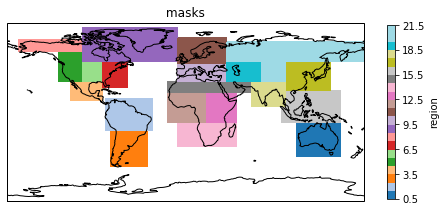

In [35]:
# global map
fig = plt.figure(figsize=[8, 4])
proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)

low = mask.min()
high = mask.max()
levels = np.arange(low - 0.5, high + 1)

mask.plot(ax=ax, transform=ccrs.PlateCarree(), levels=levels, cmap='tab20', vmax = 21.5, cbar_kwargs={'shrink': 0.8,})
ax.set_title(" masks ")
ax.coastlines();

In [36]:
# get a subset of data, and draw global plot
variable_name = 'SpeciesConc_CO2Tag11' # variable name
lev_nm        = 0                     # level
day           = 41                     # day of sim

dr = ds[variable_name].isel(lev=lev_nm,time=0,record=day)*1e-3 # unit converted to ppm
# time dimension is redundant
# record tells day of simulations, 1:180, first half year of simulation
#dr

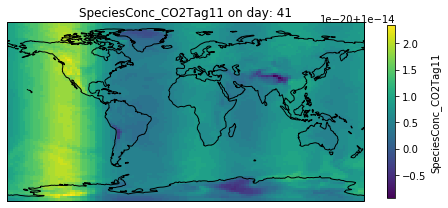

In [37]:
fig = plt.figure(figsize=[8, 4])
proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)
### mapping the variable
dr.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.8,})
ax.set_title(variable_name + ' on day: ' + str(day))
ax.coastlines();

In [38]:
# get regional mean values of the previous variable
dr_180 = ds[variable_name].isel(lev=lev_nm,time=0)*1e-3 # unit converted to ppm
co2_regional = dr_180.groupby(mask).mean('stacked_lat_lon')

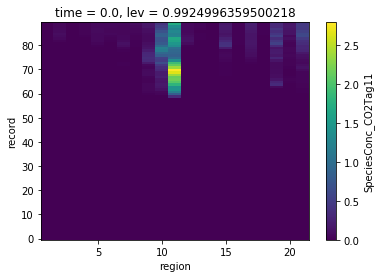

In [39]:
co2_regional.plot()

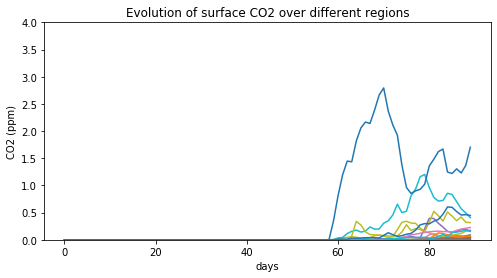

In [40]:
#tmp1=co2_regional.sel(region = 11)*1e6 #ppm
# spaghetti plot for different regions
# shows temporal evolution of surface CO2 concentration
fig = plt.figure(figsize=[8, 4])

### mapping the variable
#dr.plot(ax=ax, transform=ccrs.PlateCarree(), vmax = 5, cmap=WhGrYlRd, cbar_kwargs={'shrink': 0.8,})
#ax.set_title(variable_name + ' on day: ' + str(day))
#ax.coastlines();

for iregion in range(1,22):
    plt.plot(co2_regional.sel(region = iregion), label=iregion)
    plt.ylim(top=4)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=0)  # adjust the bottom leaving top unchanged
    plt.title('Evolution of surface CO2 over different regions')
    plt.ylabel('CO2 (ppm)')
    plt.xlabel('days')
    
fig.savefig('/geos/u73/msadiq/GEOS-Chem/analysis/python/data/CO2_evolution_Mar.png', dpi=300)